In [51]:
import numpy as np
from numpy.random import default_rng
import math
from math import ceil, log
from numpy import e
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [52]:
def psi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*t*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*t*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*(delta**2 + 2*delta*chi + epsilon**2)*e**(t*squareroot(epsilon, delta, chi)/2) \
    /((delta + 2*chi)*squareroot(epsilon, delta, chi))
    
def psi2(t, c1, c2, c3, c4, epsilon, delta, chi):
    return -c1*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) - \
    c2*t*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*t*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi)
    
def phi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c2*t*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c3*e**(t*squareroot(epsilon, delta, chi)/2) + \
    c4*t*e**(t*squareroot(epsilon, delta, chi)/2)

def phi2(t, c2, c4, epsilon, delta, chi):
    return c2*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c4*e**(t*squareroot(epsilon, delta, chi)/2)

def check_sqrt(epsilon, delta, chi):
    return -delta**2 - 2*delta*chi - epsilon**2 < 0

def squareroot(epsilon, delta, chi):
    result = -delta**2 - 2*delta*chi - epsilon**2
    return math.sqrt(result)

def func(xp):
    return (abs(psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])))**2

In [102]:
# [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip]
x0= [9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]
#[9.999999, -8, 0.4, 0.8, 0.1, 0.7, 1.01, -0.8]

dimension = 8
x=x0

intervals = [0.0000001, 0.05, 0.05, 0.05, 0.05, 0.2, 0.0001, 0.02]
num_points = 20# points for each param
func_vals_first = [0] * (num_points**2)
z_count = 0

data_1 = [0] * num_points #len 20
data_2 = [0] * num_points #len 20
lower_lim_1 = x0[1] - num_points/2*intervals[1];
lower_lim_2 = x0[2] - num_points/2*intervals[2];
# do all iterations in one program
# for param1 in range(dimension-1):
#     num_axs = 7 - param1
#     for param2 in range(num_axs):

#treat as just c1 and c2
for i in range(num_points): #t
    data_1[i] = lower_lim_1 + i*intervals[1];
    for j in range(num_points): 
        data_2[j] = lower_lim_2 + j*intervals[2]; #redundant
        func_vals_first[z_count] = func([9.99997769055193, data_1[i], data_2[j], 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551])
        z_count = z_count+1
    print(z_count)
    
        #do the check,  if invalid increment, replace index/point and do new obj func value
            #only need to do if params include epsilon, delta, or chi
#for loop in range(total_loop):
print(func_vals_first)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
[18.14036874608253, 14.859643119815372, 11.920357970387439, 9.322513297798725, 7.066109102049232, 5.151145383138963, 3.5776221410679074, 2.3455393758360796, 1.4548970874434701, 0.9056952758900795, 0.6979339411759099, 0.831613083300961, 1.3067327022652335, 2.123292798068725, 3.2812933707114373, 4.780734420193368, 6.621615946514522, 8.8039379496749, 11.327700429674492, 14.192903386513299, 17.794008885711346, 14.547089321176054, 11.64161023347999, 9.077571622623141, 6.854973488605514, 4.9738158314271095, 3.434098651087921, 2.2358219475879584, 1.3789857209272145, 0.8635899711056898, 0.6896346981233861, 0.8571199019803027, 1.3660455826764413, 2.2164117402117984, 3.4082183745863768, 4.941465485800173, 6.816153073853192, 9.032281138745438, 11.589849680476894, 14.488858699047567, 17.45102963905533, 14.237916136251904, 11.366243110287702, 8.836010561162718, 6.6472184888769545, 4.799866893430415, 3.2939557748230897, 2.12

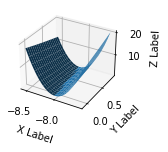

In [104]:
fig = plt.Figure(figsize=plt.figaspect(1/(7-i)))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X, Y = np.meshgrid(np.array(data_1), np.array(data_2))
zs = np.array(func_vals_first)
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig

In [92]:
# [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip]
x0= [9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]
#[9.999999, -8, 0.4, 0.8, 0.1, 0.7, 1.01, -0.8]

dimension = 8

intervals = [0.0000001, 0.05, 0.05, 0.05, 0.05, 0.2, 0.0001, 0.02]
num_points = 20 # points for each param
num_combos = 28

#  t,c1 ;  t,c2 ;  t,c3 ;  t,c4 ;  t, d ; t, e ;  t, x (7) - t
# c1,c2 ; c1,c3 ; c1,c4 ; c1, e ; c1, d ; c1, x        (6) - c1
# c2,c3 ; c2,c4 ; c2, e ; c2, d ; c2, x                (5) - c2
# c3,c4 ; c3, e ; c3, d ; c3, x                        (4) - c3
# c4, e ; c4, d ; c4, x                                (3) - c4
#  e, d ;  e, x                                        (2) - e
#  d, x                                                (1) - d

#Initialize param array
param_data = [] #7 by 20
for d in range(dimension): #arrays for t-x
    param_data.append([0] * num_points)

#Initialize z array
func_vals = [] #28 by 400
for c in range(num_combos):
    func_vals.append([0] * (num_points**2))

#Initialize lower limits so x0 is midpoint
lower_lims = []
for x in range(dimension):
    lower_lims.append(x0[x] - num_points/2*intervals[x])

#Fill param arrays
for d in range(dimension):
    for i in range(num_points):
        param_data[d][i] = lower_lims[d] + i*intervals[d]
    
xp_list = [] #what is passed into func
combo_count = 0
#Fill z arrays
for x in range(dimension-1): #x from c1-x [0, 6]
    print("x", x)
    for y in range(7-x):
        real_y = x+y+1
        print("\ty", real_y)
        print("\tcc", combo_count)
        z_count = 0
        for i in range(num_points):
            for j in range(num_points):
                xp_list = [9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551] #reset to original vals
                #print("\t\tlist",xp_list)
                xp_list[x] = param_data[x][i] #replace x param
                xp_list[real_y] = param_data[real_y][j] #replace y param
                #print("\t\tlist",xp_list)
                if check_sqrt(xp_list[5], xp_list[6], xp_list[7]):
                    func_vals[combo_count][z_count] = 0;
                else:
                    func_vals[combo_count][z_count] = func(xp_list)
                z_count = z_count+1
        combo_count = combo_count+1
          

print(combo_count)
# for i in range(num_points): #t
#     data_1[i] = lower_lim_1 + i*intervals[1];
#     for j in range(num_points): 
#         data_2[j] = lower_lim_2 + j*intervals[2]; #redundant
#         
#         z_count = z_count+1
#     print(z_count)
    
#         #do the check,  if invalid increment, replace index/point and do new obj func value
#             #only need to do if params include epsilon, delta, or chi
# #for loop in range(total_loop):
print(func_vals)

x 0
	y 1
	cc 0
	y 2
	cc 1
	y 3
	cc 2
	y 4
	cc 3
	y 5
	cc 4
	y 6
	cc 5
	y 7
	cc 6
x 1
	y 2
	cc 7
	y 3
	cc 8
	y 4
	cc 9
	y 5
	cc 10
	y 6
	cc 11
	y 7
	cc 12
x 2
	y 3
	cc 13
	y 4
	cc 14
	y 5
	cc 15
	y 6
	cc 16
	y 7
	cc 17
x 3
	y 4
	cc 18
	y 5
	cc 19
	y 6
	cc 20
	y 7
	cc 21
x 4
	y 5
	cc 22
	y 6
	cc 23
	y 7
	cc 24
x 5
	y 6
	cc 25
	y 7
	cc 26
x 6
	y 7
	cc 27
28
[[0.6979340979298801, 0.6896347865146899, 0.6847160890677517, 0.6831780055890655, 0.685020536078631, 0.6902436805364485, 0.6988474389625183, 0.7108318113568395, 0.7261967977194135, 0.7449423980502382, 0.767068612349316, 0.7925754406166452, 0.8214628828522265, 0.85373093905606, 0.8893796092281451, 0.9284088933684818, 0.9708187914770708, 1.016609303553912, 1.0657804295990059, 1.1183321696123507, 0.6979340822544213, 0.6896347776754979, 0.684716087039516, 0.6831780103464761, 0.6850205475963775, 0.6902436987892208, 0.6988474639250059, 0.7108318430037324, 0.7261968360254007, 0.7449424429900103, 0.7670686638975621, 0.7925754987480556, 0.82146

In [84]:
data_1

[-8.542455772869037,
 -8.492455772869036,
 -8.442455772869037,
 -8.392455772869036,
 -8.342455772869037,
 -8.292455772869037,
 -8.242455772869036,
 -8.192455772869037,
 -8.142455772869036,
 -8.092455772869037,
 -8.042455772869037,
 -7.992455772869037,
 -7.942455772869037,
 -7.892455772869036,
 -7.8424557728690365,
 -7.792455772869037,
 -7.742455772869037,
 -7.692455772869037,
 -7.642455772869036,
 -7.5924557728690365]

In [85]:
data_2

[-0.08958437302303168,
 -0.03958437302303168,
 0.010415626976968323,
 0.06041562697696834,
 0.11041562697696833,
 0.16041562697696832,
 0.21041562697696836,
 0.26041562697696835,
 0.31041562697696834,
 0.36041562697696833,
 0.4104156269769683,
 0.46041562697696836,
 0.5104156269769684,
 0.5604156269769683,
 0.6104156269769684,
 0.6604156269769683,
 0.7104156269769684,
 0.7604156269769684,
 0.8104156269769683,
 0.8604156269769684]

In [93]:
figs = []
for i in range(7):
    figs.append(plt.Figure(figsize=plt.figaspect(1/(7-i))))

# data stores [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip, obj]

#  t,c1 ;  t,c2 ;  t,c3 ;  t,c4 ;  t, d ; t, e ;  t, x (7) - t
# c1,c2 ; c1,c3 ; c1,c4 ; c1, e ; c1, d ; c1, x        (6) - c1
# c2,c3 ; c2,c4 ; c2, e ; c2, d ; c2, x                (5) - c2
# c3,c4 ; c3, e ; c3, d ; c3, x                        (4) - c3
# c4, e ; c4, d ; c4, x                                (3) - c4
#  e, d ;  e, x                                        (2) - e
#  d, x                                                (1) - d
combination_index=0
for overall in range(7):
    num_axs = 7 - overall
    for plot_count in range(num_axs):
        ax = figs[overall].add_subplot(1, num_axs, plot_count+1, projection='3d')
        #ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])
        
        #prep data
        #x_vals, x_idx = np.unique(data[overall], return_inverse=True)
        #y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
        print("var1", overall)
        print("\tvar2", overall+plot_count+1)
        X, Y = np.meshgrid(np.array(param_data[overall]), np.array(param_data[overall+plot_count+1]))
        zs = np.array(func_vals[combination_index])
        Z = zs.reshape(X.shape)

        ax.plot_surface(X, Y, Z)

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        #print(z_array)
        # print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax.set_title('params ' + str(overall) + ' ' + str(overall+plot_count+1))
        #ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
        combination_index = combination_index + 1

var1 0
	var2 1
var1 0
	var2 2
var1 0
	var2 3
var1 0
	var2 4
var1 0
	var2 5
var1 0
	var2 6
var1 0
	var2 7
var1 1
	var2 2
var1 1
	var2 3
var1 1
	var2 4
var1 1
	var2 5
var1 1
	var2 6
var1 1
	var2 7
var1 2
	var2 3
var1 2
	var2 4
var1 2
	var2 5
var1 2
	var2 6
var1 2
	var2 7
var1 3
	var2 4
var1 3
	var2 5
var1 3
	var2 6
var1 3
	var2 7
var1 4
	var2 5
var1 4
	var2 6
var1 4
	var2 7
var1 5
	var2 6
var1 5
	var2 7
var1 6
	var2 7


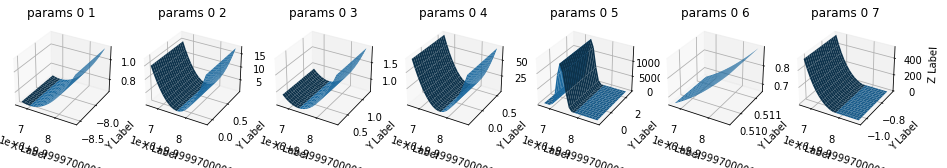

In [94]:
figs[0]

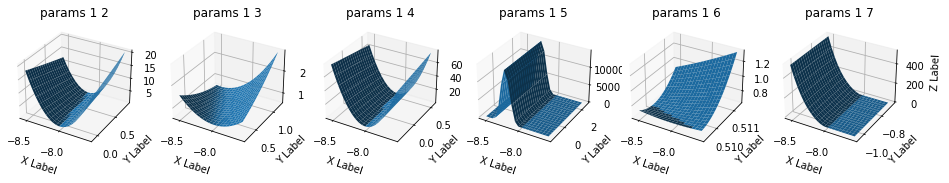

In [95]:
figs[1]

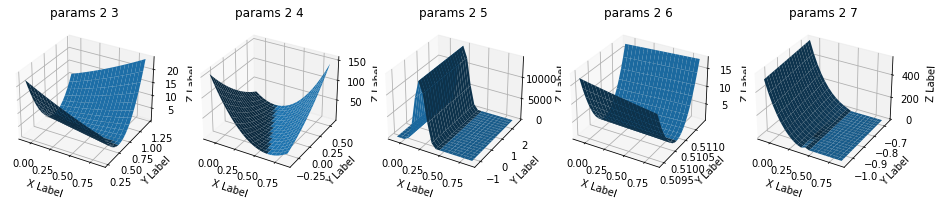

In [96]:
figs[2]

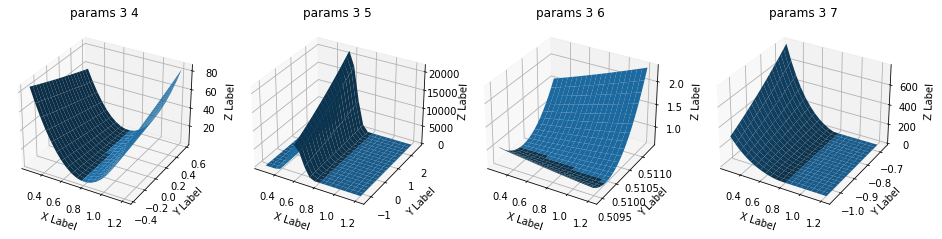

In [97]:
figs[3]

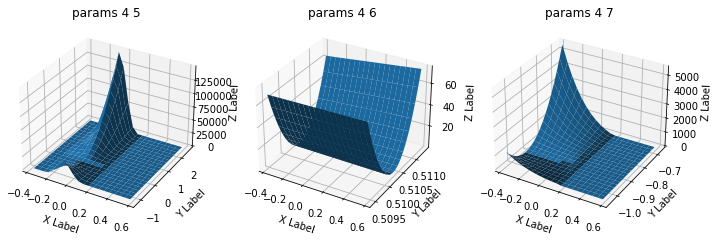

In [98]:
figs[4]

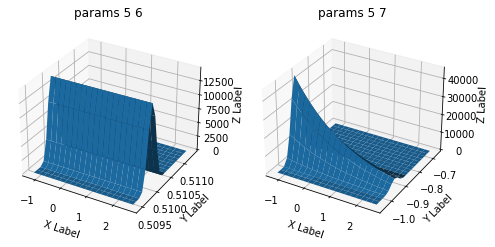

In [99]:
figs[5]

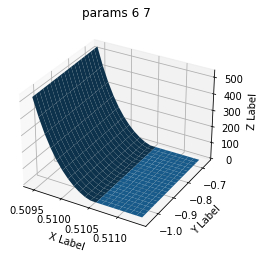

In [100]:
figs[6]

In [101]:
func_vals[7]

[18.14036874608253,
 14.859643119815372,
 11.920357970387439,
 9.322513297798725,
 7.066109102049232,
 5.151145383138963,
 3.5776221410679074,
 2.3455393758360796,
 1.4548970874434701,
 0.9056952758900795,
 0.6979339411759099,
 0.831613083300961,
 1.3067327022652335,
 2.123292798068725,
 3.2812933707114373,
 4.780734420193368,
 6.621615946514522,
 8.8039379496749,
 11.327700429674492,
 14.192903386513299,
 17.794008885711346,
 14.547089321176054,
 11.64161023347999,
 9.077571622623141,
 6.854973488605514,
 4.9738158314271095,
 3.434098651087921,
 2.2358219475879584,
 1.3789857209272145,
 0.8635899711056898,
 0.6896346981233861,
 0.8571199019803027,
 1.3660455826764413,
 2.2164117402117984,
 3.4082183745863768,
 4.941465485800173,
 6.816153073853192,
 9.032281138745438,
 11.589849680476894,
 14.488858699047567,
 17.45102963905533,
 14.237916136251904,
 11.366243110287702,
 8.836010561162718,
 6.6472184888769545,
 4.799866893430415,
 3.2939557748230897,
 2.129485133054991,
 1.30645496812

In [105]:
func_vals_first

[18.14036874608253,
 14.859643119815372,
 11.920357970387439,
 9.322513297798725,
 7.066109102049232,
 5.151145383138963,
 3.5776221410679074,
 2.3455393758360796,
 1.4548970874434701,
 0.9056952758900795,
 0.6979339411759099,
 0.831613083300961,
 1.3067327022652335,
 2.123292798068725,
 3.2812933707114373,
 4.780734420193368,
 6.621615946514522,
 8.8039379496749,
 11.327700429674492,
 14.192903386513299,
 17.794008885711346,
 14.547089321176054,
 11.64161023347999,
 9.077571622623141,
 6.854973488605514,
 4.9738158314271095,
 3.434098651087921,
 2.2358219475879584,
 1.3789857209272145,
 0.8635899711056898,
 0.6896346981233861,
 0.8571199019803027,
 1.3660455826764413,
 2.2164117402117984,
 3.4082183745863768,
 4.941465485800173,
 6.816153073853192,
 9.032281138745438,
 11.589849680476894,
 14.488858699047567,
 17.45102963905533,
 14.237916136251904,
 11.366243110287702,
 8.836010561162718,
 6.6472184888769545,
 4.799866893430415,
 3.2939557748230897,
 2.129485133054991,
 1.30645496812